In [1]:
from music21 import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.callbacks import History

from sklearn import  metrics
from help_plot import plot_decision_regions

Using TensorFlow backend.


Zacznijmy od prostego, dwuwymiarowego przypadku, dzięki któremu będziemy mogli przyglądnąć się naszym wynikom:

In [2]:
bach = pd.read_csv('bach.csv')
bach = bach[["liczby_nut", "dokladnosci_tonacji"]]
bach= bach.astype(float)

bach

,liczby_nut,dokladnosci_tonacji
0,214.0,0.907392
1,208.0,0.948021
2,228.0,0.958867
3,247.0,0.935147
4,199.0,0.972617
...,...,...
357,50.0,0.908990
358,45.0,0.791180
359,56.0,0.940300
360,860.0,0.930243


In [3]:
palestrina = pd.read_csv('palestrina.csv')
palestrina = palestrina[["liczby_nut", "dokladnosci_tonacji"]]
palestrina = palestrina.astype(float)

palestrina

,liczby_nut,dokladnosci_tonacji
0,587.0,0.876323
1,627.0,0.844736
2,513.0,0.865842
3,1065.0,0.904660
4,373.0,0.928705
...,...,...
1313,244.0,0.922416
1314,224.0,0.898357
1315,404.0,0.853625
1316,215.0,0.775142


In [4]:
ryans = pd.read_csv('ryans.csv')
ryans = ryans[["liczby_nut", "dokladnosci_tonacji"]]
ryans = ryans.astype(float)

ryans

,liczby_nut,dokladnosci_tonacji
0,192.0,0.852309
1,115.0,0.806914
2,136.0,0.723191
3,122.0,0.855020
4,131.0,0.818891
...,...,...
1054,67.0,0.778201
1055,109.0,0.885951
1056,115.0,0.785784
1057,78.0,0.910583


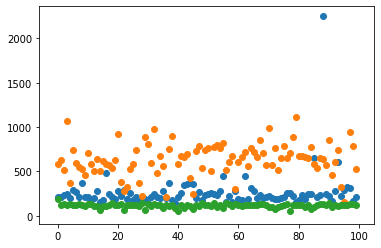

In [5]:
plt.scatter(np.arange(100), bach[:100]["liczby_nut"])
plt.scatter(np.arange(100), palestrina[:100]["liczby_nut"])
plt.scatter(np.arange(100), ryans[:100]["liczby_nut"])

plt.show()

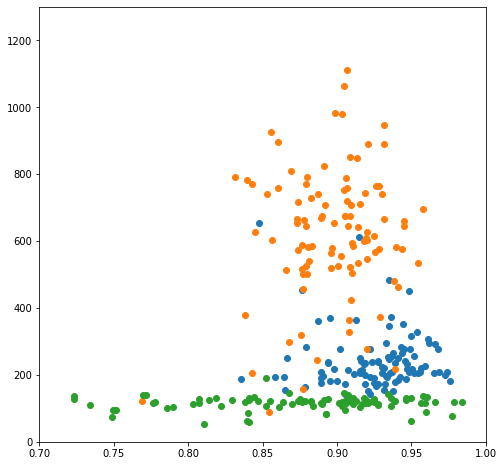

In [6]:
#plt.figure(figsize=(8,8));
#axes = plt.gca()
#axes.set_xlim([0,35])
#axes.set_ylim([0,1200])
#plt.scatter(bach[:100]["rozstawy_dzwiekow"], bach[:100]["liczby_nut"])
#plt.scatter(palestrina[:100]["rozstawy_dzwiekow"], palestrina[:100]["liczby_nut"])
#plt.scatter(ryans[:100]["rozstawy_dzwiekow"], ryans[:100]["liczby_nut"])

#plt.show()


plt.figure(figsize=(8,8));
axes = plt.gca()
axes.set_xlim([0.7,1])
axes.set_ylim([0,1300])
plt.scatter(bach[:100]["dokladnosci_tonacji"], bach[:100]["liczby_nut"])
plt.scatter(palestrina[:100]["dokladnosci_tonacji"], palestrina[:100]["liczby_nut"])
plt.scatter(ryans[:100]["dokladnosci_tonacji"], ryans[:100]["liczby_nut"])

plt.show()

Łączę dane w jedną DataFrame i dzielę na train i test:

In [7]:
X = bach.append(palestrina, ignore_index=True)
X = X.append(ryans, ignore_index = True)
y = [0]*362 + [1]*1318 + [2]*1059
X = np.array(X)
print(X.shape)
y = np.array(y)
print(y.shape)
X

(2739, 2)
(2739,)


array([[214.        ,   0.9073918 ],
       [208.        ,   0.9480214 ],
       [228.        ,   0.95886687],
       ...,
       [115.        ,   0.7857839 ],
       [ 78.        ,   0.91058297],
       [122.        ,   0.86997151]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Skalowanie danych:

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

1. Softmax Regression:

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(multi_class="multinomial",solver="lbfgs"), param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
grid.best_params_

/home/dominika/miniconda2/envs/mypython3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


{'C': 100}

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


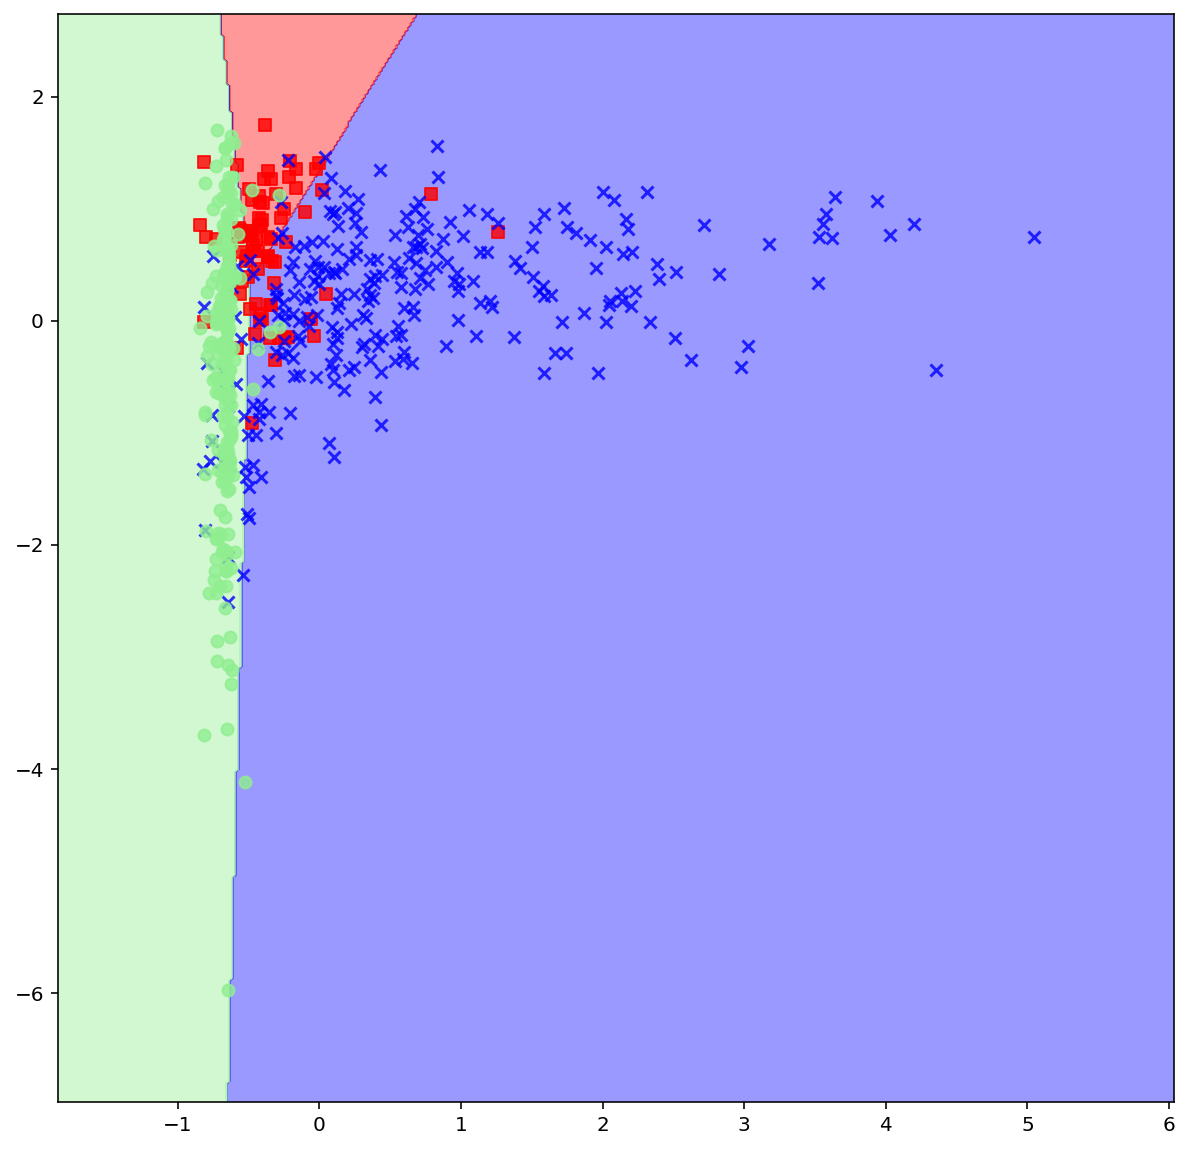

In [11]:
softmax = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42) 
softmax.fit(X_train, y_train)

model = softmax
plt.figure(figsize=(10, 10))
plot_decision_regions(X_test, y_test, model)
plt.show()

2. Decision Tree:

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.8335702086842598
0.833941605839416
0.8337501197313312
0.833941605839416


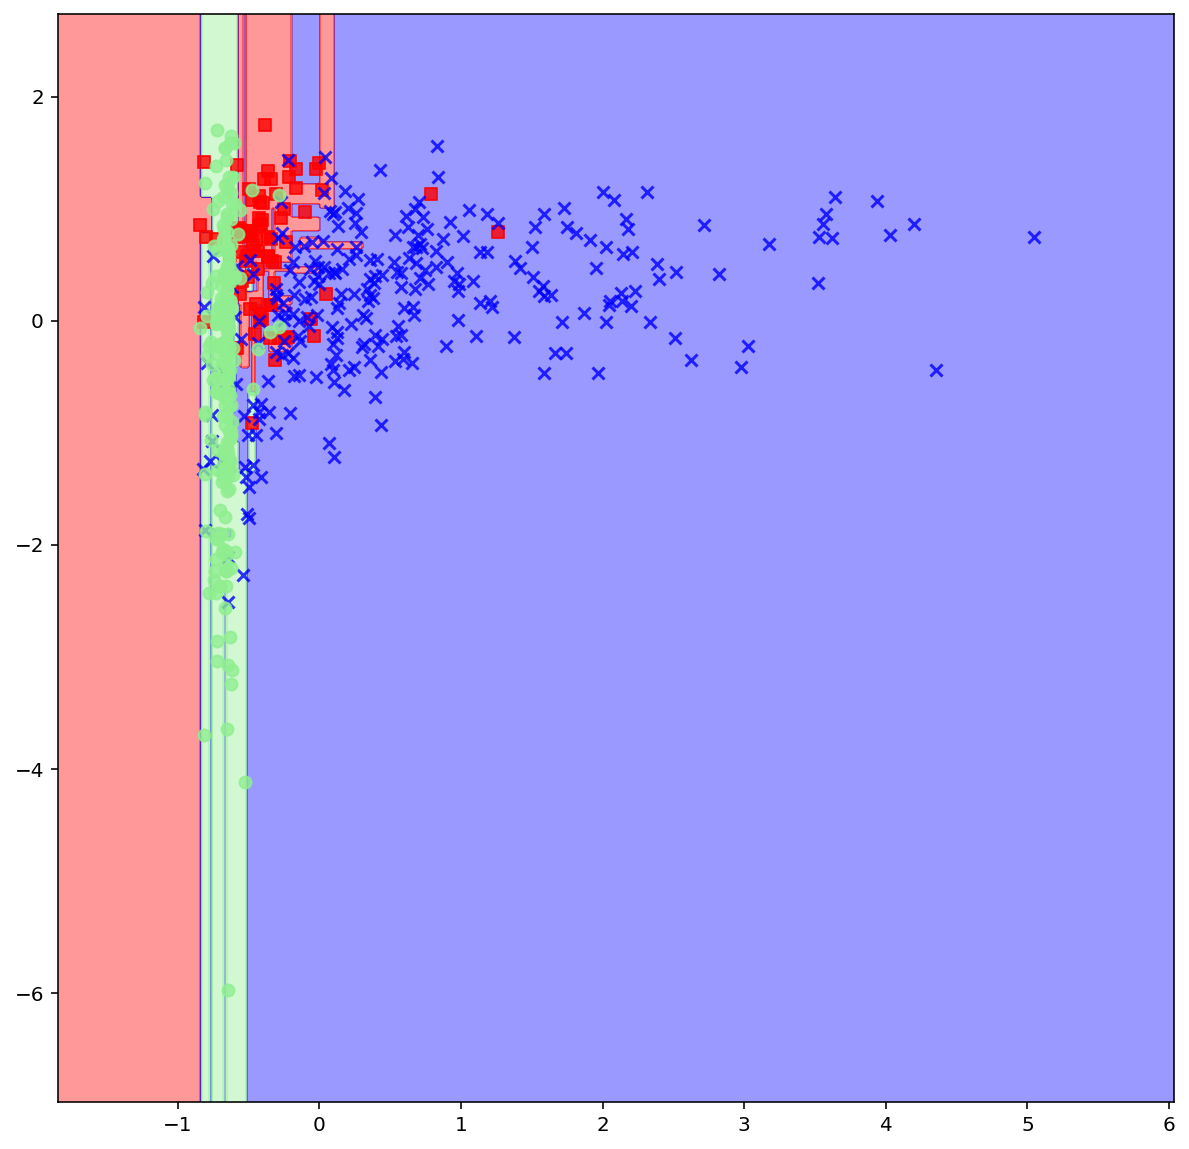

In [13]:
model = tree
print(metrics.precision_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.recall_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.f1_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize=(10, 10))
plot_decision_regions(X_test, y_test, model)
plt.show()



3. Random Forest:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


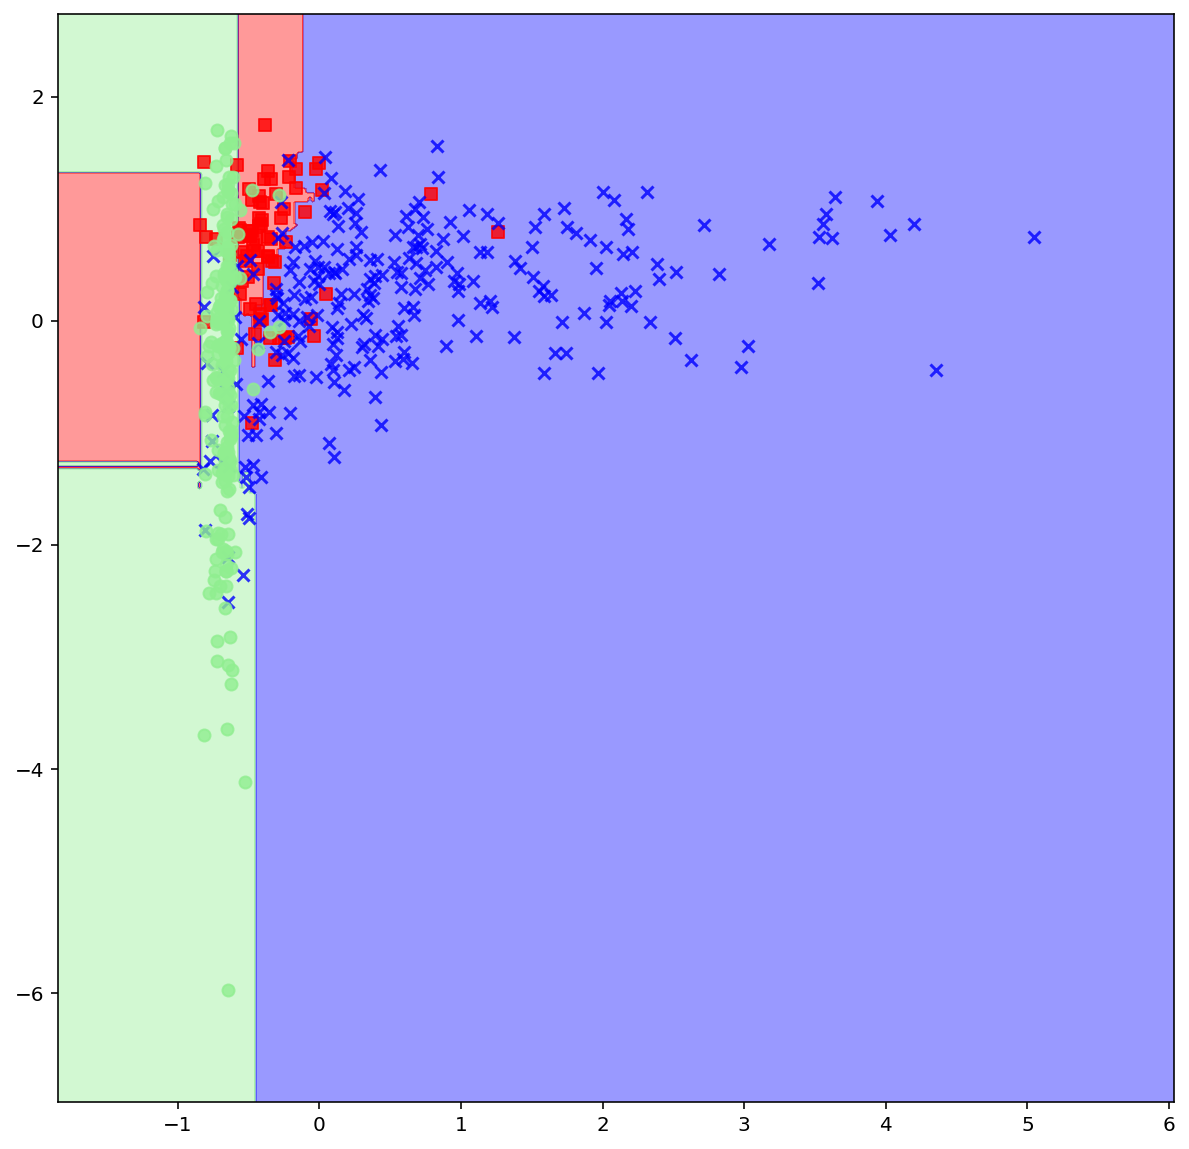

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, max_leaf_nodes=20, n_jobs=-1, random_state=42)
forest.fit(X_train, y_train)

model = forest
plt.figure(figsize=(10, 10))
plot_decision_regions(X_test, y_test, model)
plt.show()

Porównanie metod dla danych dwuwymiarowych:

In [15]:
models = [softmax, tree, forest]


precision = []
recall = []
f1 = []
accuracy = []


for model in models:
    precision.append(metrics.precision_score(y_test, model.predict(X_test), average = "weighted"))
    recall.append(metrics.recall_score(y_test, model.predict(X_test), average = "weighted"))
    f1.append(metrics.f1_score(y_test, model.predict(X_test), average = "weighted"))
    accuracy.append(metrics.accuracy_score(y_test, model.predict(X_test)))


d = {'precision': precision,
     'recall' : recall,
     'f1': f1,
     'accuracy': accuracy
    }

df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=["softmax", "tree", "forest"])
df

,Method,precision,recall,f1,accuracy
0,softmax,0.858350,0.859489,0.848682,0.859489
1,tree,0.833570,0.833942,0.833750,0.833942
2,forest,0.867782,0.870438,0.865750,0.870438


WYKORZYSTUJEMY WSZYSTKIE DOSTĘPNE PARAMETRY:

Preprocessing:

In [16]:
bach = pd.read_csv('bach.csv')
palestrina = pd.read_csv('palestrina.csv')
ryans = pd.read_csv('ryans.csv')

In [17]:
bach["liczby_uzytych_metrum"].value_counts()
palestrina["liczby_uzytych_metrum"].value_counts()

1    1318
Name: liczby_uzytych_metrum, dtype: int64

In [18]:
bach["liczby_uzytych_tonacji"].value_counts()
palestrina["liczby_uzytych_tonacji"].value_counts()

1    1318
Name: liczby_uzytych_tonacji, dtype: int64

Dane z powyższych dwóch kolumn są nieprzydatne, więc ich nie ma sensu przetwarzać i nie będziemy ich brać pod uwagę.

In [19]:
bach = bach[["liczby_nut", "dokladnosci_tonacji", "pauzy", "rozstawy_dzwiekow", "najwyzsze_dzwieki", "najnizsze_dzwieki"]]
bach= bach.astype(float)

palestrina = palestrina[["liczby_nut", "dokladnosci_tonacji" , "pauzy", "rozstawy_dzwiekow", "najwyzsze_dzwieki", "najnizsze_dzwieki"]]
palestrina = palestrina.astype(float)

ryans = ryans[["liczby_nut", "dokladnosci_tonacji", "pauzy", "rozstawy_dzwiekow", "najwyzsze_dzwieki", "najnizsze_dzwieki"]]
ryans = ryans.astype(float)


X = bach.append(palestrina, ignore_index=True)
X = X.append(ryans, ignore_index = True)
print(X.isnull().sum())

liczby_nut                0
dokladnosci_tonacji       0
pauzy                     0
rozstawy_dzwiekow         0
najwyzsze_dzwieki      1059
najnizsze_dzwieki      1059
dtype: int64


Mamy missing data, więc dzielimy na train i test i pozbywamy się missing data. Mediana wydaje się w tym przypadku rozsądnym wyborem:

In [20]:
y = [0]*362 + [1]*1318 + [2]*1059
#X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train["najwyzsze_dzwieki"].median())
print(X_train["najnizsze_dzwieki"].median())

X_train.loc[X_train.najwyzsze_dzwieki.isnull(), "najwyzsze_dzwieki"] = 77.0
X_train.loc[X_train.najnizsze_dzwieki.isnull(), "najnizsze_dzwieki"] = 46.0
X_test.loc[X_test.najwyzsze_dzwieki.isnull(), "najwyzsze_dzwieki"] = 77.0
X_test.loc[X_test.najnizsze_dzwieki.isnull(), "najnizsze_dzwieki"] = 46.0

77.0
46.0


/home/dominika/miniconda2/envs/mypython3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/dominika/miniconda2/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/dominika/miniconda2/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#X_train

Modele dla pełnych danych:

Decision Tree:

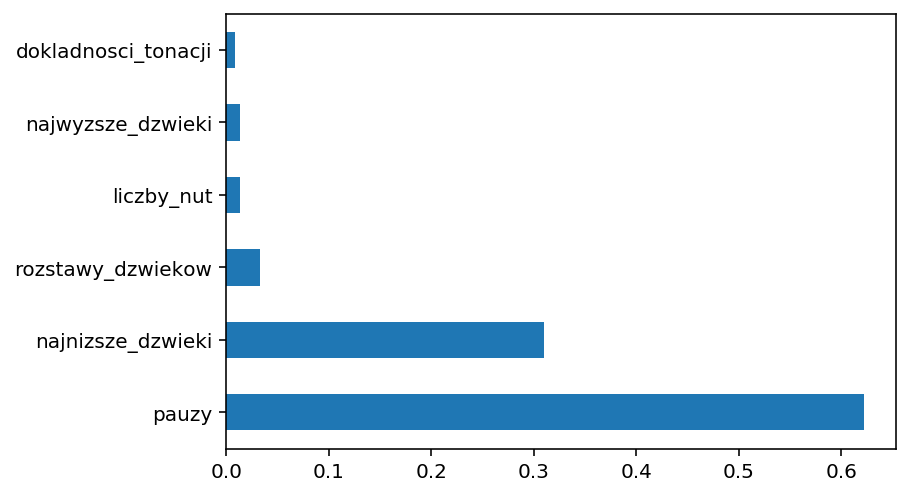

In [22]:
tree2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree2.fit(X_train, y_train)

feat_importances = pd.Series(tree2.feature_importances_, index = ["liczby_nut", "dokladnosci_tonacji" , "pauzy", "rozstawy_dzwiekow", "najwyzsze_dzwieki", "najnizsze_dzwieki"])
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

Prosta sieć neuronowa:

In [38]:
history1 = History()
neural = Sequential()
neural.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
neural.add(Dense(10,activation="sigmoid"))
neural.add(Dense(3,activation="sigmoid"))
neural.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               700       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 33        
Total params: 1,743
Trainable params: 1,743
Non-trainable params: 0
_________________________________________________________________


In [39]:
from keras.utils import to_categorical
y_binary = to_categorical(y_train)

early_stopping = EarlyStopping(patience=20,monitor="val_loss")
neural.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
neural.fit(X_train, y_binary, validation_split=0.25,epochs=100,callbacks=[early_stopping, history1])

Train on 1643 samples, validate on 548 samples
Epoch 1/100
1643/1643 [==============================] - 0s 93us/step - loss: 0.9911 - categorical_accuracy: 0.4857 - val_loss: 0.9532 - val_categorical_accuracy: 0.4726
Epoch 2/100
1643/1643 [==============================] - 0s 43us/step - loss: 0.9200 - categorical_accuracy: 0.6397 - val_loss: 0.8859 - val_categorical_accuracy: 0.7026
Epoch 3/100
1643/1643 [==============================] - 0s 39us/step - loss: 0.8366 - categorical_accuracy: 0.8028 - val_loss: 0.7789 - val_categorical_accuracy: 0.8358
Epoch 4/100
1643/1643 [==============================] - 0s 40us/step - loss: 0.7231 - categorical_accuracy: 0.8442 - val_loss: 0.6621 - val_categorical_accuracy: 0.8522
Epoch 5/100
1643/1643 [==============================] - 0s 41us/step - loss: 0.6103 - categorical_accuracy: 0.8558 - val_loss: 0.5546 - val_categorical_accuracy: 0.8504
Epoch 6/100
1643/1643 [==============================] - 0s 41us/step - loss: 0.5084 - categorical_accu

Epoch 49/100
1643/1643 [==============================] - 0s 34us/step - loss: 0.0568 - categorical_accuracy: 0.9866 - val_loss: 0.0681 - val_categorical_accuracy: 0.9818
Epoch 50/100
1643/1643 [==============================] - 0s 41us/step - loss: 0.0556 - categorical_accuracy: 0.9884 - val_loss: 0.0657 - val_categorical_accuracy: 0.9818
Epoch 51/100
1643/1643 [==============================] - 0s 45us/step - loss: 0.0544 - categorical_accuracy: 0.9878 - val_loss: 0.0668 - val_categorical_accuracy: 0.9818
Epoch 52/100
1643/1643 [==============================] - 0s 42us/step - loss: 0.0541 - categorical_accuracy: 0.9878 - val_loss: 0.0647 - val_categorical_accuracy: 0.9818
Epoch 53/100
1643/1643 [==============================] - 0s 39us/step - loss: 0.0529 - categorical_accuracy: 0.9884 - val_loss: 0.0634 - val_categorical_accuracy: 0.9836
Epoch 54/100
1643/1643 [==============================] - 0s 37us/step - loss: 0.0519 - categorical_accuracy: 0.9884 - val_loss: 0.0639 - val_cat

Epoch 97/100
1643/1643 [==============================] - 0s 36us/step - loss: 0.0389 - categorical_accuracy: 0.9897 - val_loss: 0.0588 - val_categorical_accuracy: 0.9781
Epoch 98/100
1643/1643 [==============================] - 0s 33us/step - loss: 0.0389 - categorical_accuracy: 0.9909 - val_loss: 0.0591 - val_categorical_accuracy: 0.9799
Epoch 99/100
1643/1643 [==============================] - 0s 37us/step - loss: 0.0396 - categorical_accuracy: 0.9897 - val_loss: 0.0616 - val_categorical_accuracy: 0.9781
Epoch 100/100
1643/1643 [==============================] - 0s 35us/step - loss: 0.0382 - categorical_accuracy: 0.9897 - val_loss: 0.0583 - val_categorical_accuracy: 0.9799


Bardziej skomplikowana sieć neuronowa:

In [32]:
history2 = History()
neural2 = Sequential()
neural2.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
neural2.add(Activation("relu"))
neural2.add(BatchNormalization())
neural2.add(Dropout(0.2))
neural2.add(Activation("relu"))
neural2.add(BatchNormalization())
neural2.add(Dropout(0.2))
neural2.add(Dense(10,activation="sigmoid"))
neural2.add(Dense(3,activation="sigmoid"))
neural2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               700       
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 100)               400       
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 100)               400       
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)              

In [34]:
neural2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
neural2.fit(X_train, y_binary, validation_split=0.25,epochs=100,callbacks=[early_stopping, history2])

Train on 1643 samples, validate on 548 samples
Epoch 1/100
1643/1643 [==============================] - 1s 309us/step - loss: 1.0170 - categorical_accuracy: 0.5003 - val_loss: 1.0509 - val_categorical_accuracy: 0.3942
Epoch 2/100
1643/1643 [==============================] - 0s 65us/step - loss: 0.7428 - categorical_accuracy: 0.8795 - val_loss: 0.8766 - val_categorical_accuracy: 0.5912
Epoch 3/100
1643/1643 [==============================] - 0s 56us/step - loss: 0.6175 - categorical_accuracy: 0.9489 - val_loss: 0.7414 - val_categorical_accuracy: 0.8485
Epoch 4/100
1643/1643 [==============================] - 0s 57us/step - loss: 0.5348 - categorical_accuracy: 0.9495 - val_loss: 0.6429 - val_categorical_accuracy: 0.8613
Epoch 5/100
1643/1643 [==============================] - 0s 61us/step - loss: 0.4561 - categorical_accuracy: 0.9604 - val_loss: 0.5550 - val_categorical_accuracy: 0.8668
Epoch 6/100
1643/1643 [==============================] - 0s 52us/step - loss: 0.3868 - categorical_acc

Epoch 49/100
1643/1643 [==============================] - 0s 57us/step - loss: 0.0404 - categorical_accuracy: 0.9909 - val_loss: 0.0432 - val_categorical_accuracy: 0.9909
Epoch 50/100
1643/1643 [==============================] - 0s 56us/step - loss: 0.0492 - categorical_accuracy: 0.9878 - val_loss: 0.0417 - val_categorical_accuracy: 0.9927
Epoch 51/100
1643/1643 [==============================] - 0s 57us/step - loss: 0.0561 - categorical_accuracy: 0.9842 - val_loss: 0.0390 - val_categorical_accuracy: 0.9927
Epoch 52/100
1643/1643 [==============================] - 0s 54us/step - loss: 0.0554 - categorical_accuracy: 0.9848 - val_loss: 0.0389 - val_categorical_accuracy: 0.9927
Epoch 53/100
1643/1643 [==============================] - 0s 50us/step - loss: 0.0543 - categorical_accuracy: 0.9860 - val_loss: 0.0375 - val_categorical_accuracy: 0.9909
Epoch 54/100
1643/1643 [==============================] - 0s 53us/step - loss: 0.0405 - categorical_accuracy: 0.9915 - val_loss: 0.0379 - val_cat

Epoch 97/100
1643/1643 [==============================] - 0s 67us/step - loss: 0.0317 - categorical_accuracy: 0.9933 - val_loss: 0.0330 - val_categorical_accuracy: 0.9891
Epoch 98/100
1643/1643 [==============================] - 0s 66us/step - loss: 0.0328 - categorical_accuracy: 0.9903 - val_loss: 0.0323 - val_categorical_accuracy: 0.9909
Epoch 99/100
1643/1643 [==============================] - 0s 66us/step - loss: 0.0424 - categorical_accuracy: 0.9890 - val_loss: 0.0337 - val_categorical_accuracy: 0.9891
Epoch 100/100
1643/1643 [==============================] - 0s 63us/step - loss: 0.0315 - categorical_accuracy: 0.9927 - val_loss: 0.0325 - val_categorical_accuracy: 0.9891


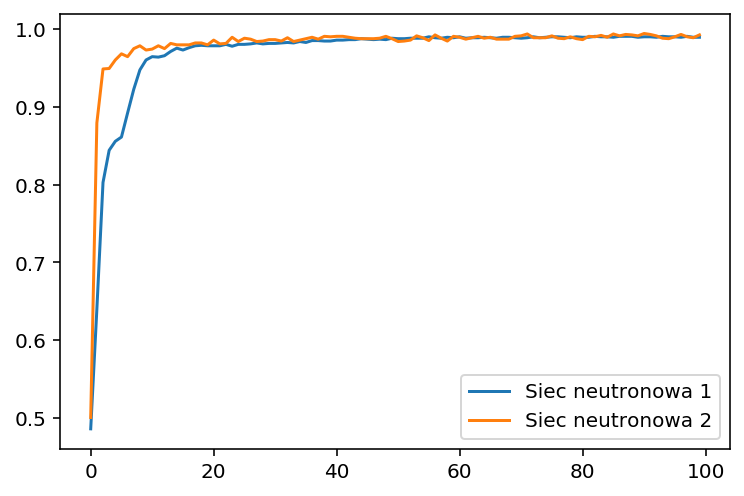

In [42]:
plt.plot(history1.history['categorical_accuracy'], label = "Siec neutronowa 1")
plt.plot(history2.history['categorical_accuracy'], label = "Siec neutronowa 2")

plt.legend()
plt.show()

I podsumowanie:

In [26]:
models = [tree2, neural]


precision = []
recall = []
f1 = []
accuracy = []


for model in models:
    precision.append(metrics.precision_score(y_test, model.predict(X_test), average = "weighted"))
    recall.append(metrics.recall_score(y_test, model.predict(X_test), average = "weighted"))
    f1.append(metrics.f1_score(y_test, model.predict(X_test), average = "weighted"))
    accuracy.append(metrics.accuracy_score(y_test, model.predict(X_test)))


d = {'precision': precision,
     'recall' : recall,
     'f1': f1,
     'accuracy': accuracy
    }

df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=["tree2","neural"])
df

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets